In [1]:
import sys

import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, LSTM, RepeatVector, TimeDistributed
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

from keras.datasets import cifar10
from keras.datasets import mnist

from keras.utils import to_categorical

import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

import pickle

class IO:
    def __init__(self, file_name):
        self.file_name = file_name
        
    def to_pickle(self, obj):
        with open(self.file_name, 'wb') as output:
            pickle.dump(obj, output, protocol=pickle.HIGHEST_PROTOCOL)
    
    def read_pickle(self):
        with open(self.file_name, 'rb') as input_:
            obj = pickle.load(input_)
        return obj

Using TensorFlow backend.


In [2]:
# Load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
class FFNN:
    def __init__(self, hidden_layers=[800, 800], droprates=[0, 0]):
        model = Sequential()
        model.add(Dropout(droprates[0], input_shape=(28*28, )))
        model.add(Dense(hidden_layers[0], activation='tanh'))
        for d in hidden_layers[1:]:
            model.add(Dropout(droprates[1]))
            model.add(Dense(d, activation='tanh'))
        model.add(Dense(10, activation='sigmoid'))
        self.model = model
        
    def fit(self, X_train, y_train, validation_data, lr=0.01, epochs=10, batch_size=100, verbose=1):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.train_size = len(y_train)
        self.test_size = len(validation_data[1])
        self.model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr), metrics=['accuracy'])
        self.result = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, \
                                     validation_data=validation_data, verbose=verbose)
        return self
    
    def get_test_errors(self):
        self.test_errors = (self.test_size * (1 - np.array(self.result.history['val_acc']))).astype(int)
        return self

In [4]:
hidden_layers = [800, 800]
ffnn1 = [FFNN(hidden_layers=hidden_layers), 
         FFNN(hidden_layers=hidden_layers, droprates=[0, 0.5]),
         FFNN(hidden_layers=hidden_layers, droprates=[0.2, 0.5])]

In [5]:
%%time

ffnn1[0].model.summary()
ffnn1[0].fit(X_train, y_train, (X_test, y_test), lr=0.1, epochs=3000, batch_size=100, verbose=1).get_test_errors();

#IO('results/ffnn1_no_dropout_results.pkl').to_pickle((ffnn1[0].result.history, ffnn1[0].test_errors));

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3000
60000/60000 [==============================] - 6s 102us/step - loss: 

60000/60000 [==============================] - 3s 48us/step - loss: 0.0032 - acc: 0.9999 - val_loss: 0.0592 - val_acc: 0.9827
Epoch 53/3000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.0592 - val_acc: 0.9830
Epoch 54/3000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 0.0595 - val_acc: 0.9825
Epoch 55/3000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0027 - acc: 0.9999 - val_loss: 0.0594 - val_acc: 0.9827
Epoch 56/3000
60000/60000 [==============================] - 3s 48us/step - loss: 0.0027 - acc: 0.9999 - val_loss: 0.0598 - val_acc: 0.9824
Epoch 57/3000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.0592 - val_acc: 0.9825
Epoch 58/3000
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.0594 - val_acc: 0.9831
Epoch 59/3000
60000/60000 [=======

60000/60000 [==============================] - 3s 48us/step - loss: 8.0859e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9833
Epoch 111/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.9810e-04 - acc: 1.0000 - val_loss: 0.0634 - val_acc: 0.9835
Epoch 112/3000
60000/60000 [==============================] - 3s 49us/step - loss: 7.8269e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9830
Epoch 113/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.7498e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9836
Epoch 114/3000
60000/60000 [==============================] - 3s 47us/step - loss: 7.6477e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9832
Epoch 115/3000
60000/60000 [==============================] - 3s 47us/step - loss: 7.5503e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9833
Epoch 116/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.4640e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9834


60000/60000 [==============================] - 3s 48us/step - loss: 4.4281e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9834
Epoch 167/3000
60000/60000 [==============================] - 3s 48us/step - loss: 4.3887e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9835
Epoch 168/3000
60000/60000 [==============================] - 3s 48us/step - loss: 4.3467e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9834
Epoch 169/3000
60000/60000 [==============================] - 3s 48us/step - loss: 4.3181e-04 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9835
Epoch 170/3000
60000/60000 [==============================] - 3s 47us/step - loss: 4.2836e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9834
Epoch 171/3000
60000/60000 [==============================] - 3s 47us/step - loss: 4.2421e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9835
Epoch 172/3000
60000/60000 [==============================] - 3s 48us/step - loss: 4.2135e-04 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0.9834


60000/60000 [==============================] - 3s 47us/step - loss: 2.9957e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9834
Epoch 223/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.9772e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9834
Epoch 224/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.9569e-04 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9834
Epoch 225/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.9484e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9835
Epoch 226/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.9257e-04 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9834
Epoch 227/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.9086e-04 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9836
Epoch 228/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.8952e-04 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 0.9835


60000/60000 [==============================] - 3s 47us/step - loss: 2.2465e-04 - acc: 1.0000 - val_loss: 0.0692 - val_acc: 0.9836
Epoch 279/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2380e-04 - acc: 1.0000 - val_loss: 0.0692 - val_acc: 0.9837
Epoch 280/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.2270e-04 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9835
Epoch 281/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.2186e-04 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 0.9838
Epoch 282/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2060e-04 - acc: 1.0000 - val_loss: 0.0692 - val_acc: 0.9837
Epoch 283/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1952e-04 - acc: 1.0000 - val_loss: 0.0695 - val_acc: 0.9834
Epoch 284/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1888e-04 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 0.9837


60000/60000 [==============================] - 3s 47us/step - loss: 1.7900e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9837
Epoch 335/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7874e-04 - acc: 1.0000 - val_loss: 0.0705 - val_acc: 0.9836
Epoch 336/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7785e-04 - acc: 1.0000 - val_loss: 0.0703 - val_acc: 0.9836
Epoch 337/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7735e-04 - acc: 1.0000 - val_loss: 0.0703 - val_acc: 0.9836
Epoch 338/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7678e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9837
Epoch 339/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7620e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9837
Epoch 340/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7540e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9836


60000/60000 [==============================] - 3s 47us/step - loss: 1.4903e-04 - acc: 1.0000 - val_loss: 0.0712 - val_acc: 0.9836
Epoch 391/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4850e-04 - acc: 1.0000 - val_loss: 0.0712 - val_acc: 0.9835
Epoch 392/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4813e-04 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 0.9836
Epoch 393/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4760e-04 - acc: 1.0000 - val_loss: 0.0712 - val_acc: 0.9836
Epoch 394/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4724e-04 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 0.9835
Epoch 395/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4692e-04 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 0.9836
Epoch 396/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4640e-04 - acc: 1.0000 - val_loss: 0.0714 - val_acc: 0.9835


60000/60000 [==============================] - 3s 47us/step - loss: 1.2762e-04 - acc: 1.0000 - val_loss: 0.0720 - val_acc: 0.9837
Epoch 447/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2714e-04 - acc: 1.0000 - val_loss: 0.0720 - val_acc: 0.9836
Epoch 448/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2689e-04 - acc: 1.0000 - val_loss: 0.0720 - val_acc: 0.9834
Epoch 449/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2654e-04 - acc: 1.0000 - val_loss: 0.0722 - val_acc: 0.9836
Epoch 450/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2616e-04 - acc: 1.0000 - val_loss: 0.0720 - val_acc: 0.9834
Epoch 451/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2599e-04 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9834
Epoch 452/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2562e-04 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9836


60000/60000 [==============================] - 3s 47us/step - loss: 1.1151e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9834
Epoch 503/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.1127e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9835
Epoch 504/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1098e-04 - acc: 1.0000 - val_loss: 0.0728 - val_acc: 0.9834
Epoch 505/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.1083e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9834
Epoch 506/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1053e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9834
Epoch 507/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.1029e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9835
Epoch 508/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.1009e-04 - acc: 1.0000 - val_loss: 0.0728 - val_acc: 0.9834


60000/60000 [==============================] - 3s 47us/step - loss: 9.9217e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9834
Epoch 559/3000
60000/60000 [==============================] - 3s 47us/step - loss: 9.9016e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9833
Epoch 560/3000
60000/60000 [==============================] - 3s 47us/step - loss: 9.8788e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9834
Epoch 561/3000
60000/60000 [==============================] - 3s 48us/step - loss: 9.8627e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9833
Epoch 562/3000
60000/60000 [==============================] - 3s 47us/step - loss: 9.8415e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9833
Epoch 563/3000
60000/60000 [==============================] - 3s 47us/step - loss: 9.8225e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9833
Epoch 564/3000
60000/60000 [==============================] - 3s 47us/step - loss: 9.8031e-05 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9835


60000/60000 [==============================] - 3s 48us/step - loss: 8.9405e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9834
Epoch 615/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.9267e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9835
Epoch 616/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.9077e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9833
Epoch 617/3000
60000/60000 [==============================] - 3s 48us/step - loss: 8.8932e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9834
Epoch 618/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.8778e-05 - acc: 1.0000 - val_loss: 0.0740 - val_acc: 0.9833
Epoch 619/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.8540e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9834
Epoch 620/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.8495e-05 - acc: 1.0000 - val_loss: 0.0739 - val_acc: 0.9834


60000/60000 [==============================] - 3s 48us/step - loss: 8.1495e-05 - acc: 1.0000 - val_loss: 0.0744 - val_acc: 0.9834
Epoch 671/3000
60000/60000 [==============================] - 3s 48us/step - loss: 8.1328e-05 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 0.9834
Epoch 672/3000
60000/60000 [==============================] - 3s 47us/step - loss: 8.1235e-05 - acc: 1.0000 - val_loss: 0.0744 - val_acc: 0.9835
Epoch 673/3000
60000/60000 [==============================] - 3s 49us/step - loss: 8.1098e-05 - acc: 1.0000 - val_loss: 0.0744 - val_acc: 0.9835
Epoch 674/3000
60000/60000 [==============================] - 3s 48us/step - loss: 8.0990e-05 - acc: 1.0000 - val_loss: 0.0744 - val_acc: 0.9835
Epoch 675/3000
60000/60000 [==============================] - 3s 48us/step - loss: 8.0853e-05 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 0.9834
Epoch 676/3000
60000/60000 [==============================] - 3s 48us/step - loss: 8.0706e-05 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 0.9834


60000/60000 [==============================] - 3s 48us/step - loss: 7.4933e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9834
Epoch 727/3000
60000/60000 [==============================] - 3s 47us/step - loss: 7.4825e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9836
Epoch 728/3000
60000/60000 [==============================] - 3s 47us/step - loss: 7.4732e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9835
Epoch 729/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.4626e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9833
Epoch 730/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.4492e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9833
Epoch 731/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.4404e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9836
Epoch 732/3000
60000/60000 [==============================] - 3s 48us/step - loss: 7.4313e-05 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9836


60000/60000 [==============================] - 3s 48us/step - loss: 6.9433e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9835
Epoch 783/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.9301e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9835
Epoch 784/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.9280e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9836
Epoch 785/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.9138e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9834
Epoch 786/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.9089e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9835
Epoch 787/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.8985e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9836
Epoch 788/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.8909e-05 - acc: 1.0000 - val_loss: 0.0753 - val_acc: 0.9835


60000/60000 [==============================] - 3s 48us/step - loss: 6.4782e-05 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9835
Epoch 839/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.4686e-05 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9836
Epoch 840/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.4614e-05 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9835
Epoch 841/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.4542e-05 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9835
Epoch 842/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.4473e-05 - acc: 1.0000 - val_loss: 0.0757 - val_acc: 0.9835
Epoch 843/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.4392e-05 - acc: 1.0000 - val_loss: 0.0758 - val_acc: 0.9835
Epoch 844/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.4307e-05 - acc: 1.0000 - val_loss: 0.0758 - val_acc: 0.9835


60000/60000 [==============================] - 3s 48us/step - loss: 6.0754e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 895/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.0683e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9834
Epoch 896/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.0631e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 897/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.0566e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 898/3000
60000/60000 [==============================] - 3s 48us/step - loss: 6.0499e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 899/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.0426e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835
Epoch 900/3000
60000/60000 [==============================] - 3s 47us/step - loss: 6.0367e-05 - acc: 1.0000 - val_loss: 0.0761 - val_acc: 0.9835


60000/60000 [==============================] - 3s 48us/step - loss: 5.7270e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 951/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.7215e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 952/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.7150e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 953/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.7094e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 954/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.7034e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 955/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.6972e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 956/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.6918e-05 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9835


60000/60000 [==============================] - 3s 48us/step - loss: 5.4186e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9837
Epoch 1007/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.4151e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9836
Epoch 1008/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.4094e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9836
Epoch 1009/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.4043e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9836
Epoch 1010/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.3990e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9836
Epoch 1011/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.3941e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9836
Epoch 1012/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.3898e-05 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 5.1351e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9835
Epoch 1063/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.1302e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9836
Epoch 1064/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.1242e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9835
Epoch 1065/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.1183e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9835
Epoch 1066/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.1124e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9835
Epoch 1067/3000
60000/60000 [==============================] - 3s 48us/step - loss: 5.1060e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0.9837
Epoch 1068/3000
60000/60000 [==============================] - 3s 47us/step - loss: 5.0999e-05 - acc: 1.0000 - val_loss: 0.0770 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 3.8695e-05 - acc: 1.0000 - val_loss: 0.0771 - val_acc: 0.9836
Epoch 1119/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.8631e-05 - acc: 1.0000 - val_loss: 0.0771 - val_acc: 0.9837
Epoch 1120/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.8586e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9835
Epoch 1121/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.8530e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9836
Epoch 1122/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.8474e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9835
Epoch 1123/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.8424e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9836
Epoch 1124/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.8374e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 3.6098e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9835
Epoch 1175/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.6045e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9836
Epoch 1176/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.6014e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9836
Epoch 1177/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.5975e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9836
Epoch 1178/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.5932e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9836
Epoch 1179/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.5882e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9836
Epoch 1180/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.5847e-05 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 3.3992e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9836
Epoch 1231/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.3956e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9837
Epoch 1232/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.3918e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9836
Epoch 1233/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.3881e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9837
Epoch 1234/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.3846e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9835
Epoch 1235/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.3813e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0.9836
Epoch 1236/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.3779e-05 - acc: 1.0000 - val_loss: 0.0777 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 3.2151e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9835
Epoch 1287/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.2120e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9835
Epoch 1288/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.2088e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9835
Epoch 1289/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.2059e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9836
Epoch 1290/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.2026e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9836
Epoch 1291/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.1996e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9836
Epoch 1292/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.1967e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 3.0511e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1343/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.0484e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1344/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.0456e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1345/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.0427e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1346/3000
60000/60000 [==============================] - 3s 48us/step - loss: 3.0400e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1347/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.0372e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9836
Epoch 1348/3000
60000/60000 [==============================] - 3s 47us/step - loss: 3.0346e-05 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.9030e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1399/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.9008e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1400/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.8982e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1401/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.8954e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1402/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.8930e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1403/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.8908e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0.9836
Epoch 1404/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.8881e-05 - acc: 1.0000 - val_loss: 0.0784 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 2.7686e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9836
Epoch 1455/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.7662e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9836
Epoch 1456/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.7642e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9836
Epoch 1457/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.7618e-05 - acc: 1.0000 - val_loss: 0.0786 - val_acc: 0.9836
Epoch 1458/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.7595e-05 - acc: 1.0000 - val_loss: 0.0787 - val_acc: 0.9836
Epoch 1459/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.7573e-05 - acc: 1.0000 - val_loss: 0.0787 - val_acc: 0.9836
Epoch 1460/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.7548e-05 - acc: 1.0000 - val_loss: 0.0787 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 2.6459e-05 - acc: 1.0000 - val_loss: 0.0788 - val_acc: 0.9836
Epoch 1511/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.6433e-05 - acc: 1.0000 - val_loss: 0.0789 - val_acc: 0.9836
Epoch 1512/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.6415e-05 - acc: 1.0000 - val_loss: 0.0788 - val_acc: 0.9836
Epoch 1513/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.6393e-05 - acc: 1.0000 - val_loss: 0.0788 - val_acc: 0.9837
Epoch 1514/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.6372e-05 - acc: 1.0000 - val_loss: 0.0789 - val_acc: 0.9836
Epoch 1515/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.6352e-05 - acc: 1.0000 - val_loss: 0.0789 - val_acc: 0.9836
Epoch 1516/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.6329e-05 - acc: 1.0000 - val_loss: 0.0789 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 2.5327e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9837
Epoch 1567/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.5309e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9836
Epoch 1568/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.5290e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9837
Epoch 1569/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.5270e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9836
Epoch 1570/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.5250e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9836
Epoch 1571/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.5232e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0.9836
Epoch 1572/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.5213e-05 - acc: 1.0000 - val_loss: 0.0791 - val_acc: 0

60000/60000 [==============================] - 3s 49us/step - loss: 2.4288e-05 - acc: 1.0000 - val_loss: 0.0792 - val_acc: 0.9837
Epoch 1623/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.4270e-05 - acc: 1.0000 - val_loss: 0.0792 - val_acc: 0.9837
Epoch 1624/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.4255e-05 - acc: 1.0000 - val_loss: 0.0792 - val_acc: 0.9837
Epoch 1625/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.4235e-05 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9837
Epoch 1626/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.4216e-05 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9837
Epoch 1627/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.4199e-05 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9837
Epoch 1628/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.4182e-05 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.3328e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1679/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.3310e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1680/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.3295e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1681/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.3278e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1682/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.3262e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1683/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.3245e-05 - acc: 1.0000 - val_loss: 0.0794 - val_acc: 0.9837
Epoch 1684/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.3229e-05 - acc: 1.0000 - val_loss: 0.0795 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.2437e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1735/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2422e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1736/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2407e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1737/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2391e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1738/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.2376e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1739/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2362e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9837
Epoch 1740/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.2346e-05 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.1609e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1791/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1595e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1792/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1581e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1793/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1565e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1794/3000
60000/60000 [==============================] - 3s 49us/step - loss: 2.1553e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1795/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.1539e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0.9837
Epoch 1796/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.1524e-05 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.0837e-05 - acc: 1.0000 - val_loss: 0.0799 - val_acc: 0.9837
Epoch 1847/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0825e-05 - acc: 1.0000 - val_loss: 0.0800 - val_acc: 0.9837
Epoch 1848/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.0810e-05 - acc: 1.0000 - val_loss: 0.0799 - val_acc: 0.9837
Epoch 1849/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0797e-05 - acc: 1.0000 - val_loss: 0.0799 - val_acc: 0.9837
Epoch 1850/3000
60000/60000 [==============================] - 3s 49us/step - loss: 2.0784e-05 - acc: 1.0000 - val_loss: 0.0800 - val_acc: 0.9837
Epoch 1851/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0769e-05 - acc: 1.0000 - val_loss: 0.0800 - val_acc: 0.9837
Epoch 1852/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.0757e-05 - acc: 1.0000 - val_loss: 0.0800 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 2.0116e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1903/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.0104e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1904/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0090e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1905/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.0077e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1906/3000
60000/60000 [==============================] - 3s 48us/step - loss: 2.0066e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1907/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0054e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0.9837
Epoch 1908/3000
60000/60000 [==============================] - 3s 47us/step - loss: 2.0041e-05 - acc: 1.0000 - val_loss: 0.0801 - val_acc: 0

60000/60000 [==============================] - 3s 49us/step - loss: 1.9441e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1959/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9428e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1960/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9416e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1961/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9405e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1962/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9393e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1963/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9382e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0.9837
Epoch 1964/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.9372e-05 - acc: 1.0000 - val_loss: 0.0803 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.8808e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2015/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.8797e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2016/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.8785e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2017/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8773e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2018/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8763e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2019/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.8753e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0.9837
Epoch 2020/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8742e-05 - acc: 1.0000 - val_loss: 0.0804 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.8211e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2071/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8202e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2072/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.8192e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2073/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8180e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2074/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8171e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2075/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8161e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9837
Epoch 2076/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.8150e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 1.7651e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2127/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7641e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2128/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7632e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2129/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7622e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2130/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7612e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9838
Epoch 2131/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7603e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9837
Epoch 2132/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7594e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 1.7123e-05 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 0.9837
Epoch 2183/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7114e-05 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 0.9837
Epoch 2184/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7105e-05 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 0.9837
Epoch 2185/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7096e-05 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 0.9837
Epoch 2186/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7087e-05 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 0.9837
Epoch 2187/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.7077e-05 - acc: 1.0000 - val_loss: 0.0809 - val_acc: 0.9837
Epoch 2188/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.7068e-05 - acc: 1.0000 - val_loss: 0.0809 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 1.6623e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9838
Epoch 2239/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6615e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9837
Epoch 2240/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6607e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9837
Epoch 2241/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6598e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9837
Epoch 2242/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6589e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9837
Epoch 2243/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6581e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9837
Epoch 2244/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6572e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.6151e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2295/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6143e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2296/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6135e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2297/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6127e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2298/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6119e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2299/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.6109e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 2300/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.6102e-05 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.5704e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2351/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5696e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2352/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5688e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2353/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5681e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2354/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5673e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2355/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5665e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9837
Epoch 2356/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5658e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.5279e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9836
Epoch 2407/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.5272e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9836
Epoch 2408/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.5265e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9836
Epoch 2409/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5257e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9836
Epoch 2410/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.5250e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9837
Epoch 2411/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5243e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9836
Epoch 2412/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.5236e-05 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 1.4876e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2463/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4868e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2464/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4862e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2465/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4855e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2466/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4848e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2467/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4841e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9836
Epoch 2468/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4834e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0

60000/60000 [==============================] - 3s 49us/step - loss: 1.4493e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9836
Epoch 2519/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.4486e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9836
Epoch 2520/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.4479e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9837
Epoch 2521/3000
60000/60000 [==============================] - 3s 49us/step - loss: 1.4472e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9837
Epoch 2522/3000
60000/60000 [==============================] - 3s 49us/step - loss: 1.4466e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9837
Epoch 2523/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.4460e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9837
Epoch 2524/3000
60000/60000 [==============================] - 3s 49us/step - loss: 1.4451e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.4127e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9837
Epoch 2575/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4121e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9836
Epoch 2576/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.4115e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9836
Epoch 2577/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4108e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9836
Epoch 2578/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4101e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9836
Epoch 2579/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4096e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9836
Epoch 2580/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.4089e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.3779e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9836
Epoch 2631/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3773e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9836
Epoch 2632/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3767e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9836
Epoch 2633/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3761e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9837
Epoch 2634/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3755e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9837
Epoch 2635/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3749e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0.9837
Epoch 2636/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3743e-05 - acc: 1.0000 - val_loss: 0.0818 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.3447e-05 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9838
Epoch 2687/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3441e-05 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9837
Epoch 2688/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3436e-05 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9836
Epoch 2689/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3430e-05 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9837
Epoch 2690/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3424e-05 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9837
Epoch 2691/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3418e-05 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 0.9838
Epoch 2692/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3413e-05 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 0

60000/60000 [==============================] - 3s 47us/step - loss: 1.3130e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9838
Epoch 2743/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3125e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9838
Epoch 2744/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3119e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9839
Epoch 2745/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3114e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9836
Epoch 2746/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.3108e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9838
Epoch 2747/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3102e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0.9837
Epoch 2748/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.3096e-05 - acc: 1.0000 - val_loss: 0.0821 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.2826e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9838
Epoch 2799/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2822e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9839
Epoch 2800/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2816e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9839
Epoch 2801/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2811e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9839
Epoch 2802/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2806e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9839
Epoch 2803/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2800e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9839
Epoch 2804/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2795e-05 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.2537e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2855/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2531e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2856/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2526e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2857/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2521e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2858/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2516e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2859/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2511e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0.9839
Epoch 2860/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2506e-05 - acc: 1.0000 - val_loss: 0.0823 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.2259e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2911/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2254e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2912/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2249e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2913/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2244e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2914/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2239e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2915/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.2234e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 2916/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.2230e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0

60000/60000 [==============================] - 3s 48us/step - loss: 1.1992e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2967/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1988e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2968/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1983e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2969/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1978e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2970/3000
60000/60000 [==============================] - 3s 48us/step - loss: 1.1974e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2971/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1969e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0.9839
Epoch 2972/3000
60000/60000 [==============================] - 3s 47us/step - loss: 1.1964e-05 - acc: 1.0000 - val_loss: 0.0825 - val_acc: 0

In [6]:
%%time

ffnn1[1].model.summary()
ffnn1[1].fit(X_train, y_train, (X_test, y_test), lr=0.1, epochs=3000, batch_size=100, verbose=1).get_test_errors();

#IO('results/ffnn1_dropout1_results.pkl').to_pickle((ffnn1[1].result.history, ffnn1[1].test_errors));

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3000
60000/60000 [==============================] - 3s 54us/step - loss: 0

60000/60000 [==============================] - 3s 51us/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.0533 - val_acc: 0.9835
Epoch 53/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0529 - val_acc: 0.9837
Epoch 54/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0532 - val_acc: 0.9832
Epoch 55/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0147 - acc: 0.9957 - val_loss: 0.0502 - val_acc: 0.9849
Epoch 56/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0137 - acc: 0.9962 - val_loss: 0.0529 - val_acc: 0.9840
Epoch 57/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0136 - acc: 0.9962 - val_loss: 0.0529 - val_acc: 0.9840
Epoch 58/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0129 - acc: 0.9963 - val_loss: 0.0533 - val_acc: 0.9830
Epoch 59/3000
60000/60000 [=======

60000/60000 [==============================] - 3s 51us/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0515 - val_acc: 0.9847
Epoch 111/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0052 - acc: 0.9989 - val_loss: 0.0554 - val_acc: 0.9853
Epoch 112/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0532 - val_acc: 0.9847
Epoch 113/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0045 - acc: 0.9994 - val_loss: 0.0519 - val_acc: 0.9848
Epoch 114/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0046 - acc: 0.9992 - val_loss: 0.0544 - val_acc: 0.9842
Epoch 115/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0045 - acc: 0.9991 - val_loss: 0.0538 - val_acc: 0.9848
Epoch 116/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.0553 - val_acc: 0.9839
Epoch 117/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9996 - val_loss: 0.0544 - val_acc: 0.9851
Epoch 169/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0542 - val_acc: 0.9849
Epoch 170/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0553 - val_acc: 0.9848
Epoch 171/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0547 - val_acc: 0.9850
Epoch 172/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0567 - val_acc: 0.9853
Epoch 173/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0023 - acc: 0.9997 - val_loss: 0.0550 - val_acc: 0.9855
Epoch 174/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0543 - val_acc: 0.9860
Epoch 175/3000
60000/60000 [

60000/60000 [==============================] - 3s 51us/step - loss: 0.0017 - acc: 0.9998 - val_loss: 0.0558 - val_acc: 0.9859
Epoch 227/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.0557 - val_acc: 0.9859
Epoch 228/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0016 - acc: 0.9998 - val_loss: 0.0551 - val_acc: 0.9855
Epoch 229/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0016 - acc: 0.9998 - val_loss: 0.0552 - val_acc: 0.9857
Epoch 230/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0554 - val_acc: 0.9859
Epoch 231/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0568 - val_acc: 0.9858
Epoch 232/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0560 - val_acc: 0.9858
Epoch 233/3000
60000/60000 [

60000/60000 [==============================] - 3s 51us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0565 - val_acc: 0.9856
Epoch 285/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0576 - val_acc: 0.9859
Epoch 286/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0591 - val_acc: 0.9856
Epoch 287/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0570 - val_acc: 0.9854
Epoch 288/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0570 - val_acc: 0.9856
Epoch 289/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0576 - val_acc: 0.9859
Epoch 290/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0576 - val_acc: 0.9854
Epoch 291/3000
60000/60000 [

Epoch 342/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0570 - val_acc: 0.9860
Epoch 343/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0556 - val_acc: 0.9859
Epoch 344/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0570 - val_acc: 0.9860
Epoch 345/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0571 - val_acc: 0.9858
Epoch 346/3000
60000/60000 [==============================] - 3s 51us/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0590 - val_acc: 0.9853
Epoch 347/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.4344e-04 - acc: 0.9999 - val_loss: 0.0568 - val_acc: 0.9861
Epoch 348/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.3106e-04 - acc: 0.9999 - val_loss: 0.0574 - val_acc: 0.9861
Epoch

Epoch 399/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0662e-04 - acc: 0.9999 - val_loss: 0.0571 - val_acc: 0.9861
Epoch 400/3000
60000/60000 [==============================] - 3s 52us/step - loss: 8.2867e-04 - acc: 0.9999 - val_loss: 0.0583 - val_acc: 0.9855
Epoch 401/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.0175e-04 - acc: 0.9999 - val_loss: 0.0587 - val_acc: 0.9867
Epoch 402/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.9438e-04 - acc: 0.9999 - val_loss: 0.0580 - val_acc: 0.9857
Epoch 403/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.8212e-04 - acc: 0.9999 - val_loss: 0.0574 - val_acc: 0.9860
Epoch 404/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.9237e-04 - acc: 0.9999 - val_loss: 0.0575 - val_acc: 0.9864
Epoch 405/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.2315e-04 - acc: 0.9998 - val_loss: 0.0580 - v

60000/60000 [==============================] - 3s 52us/step - loss: 6.2862e-04 - acc: 1.0000 - val_loss: 0.0579 - val_acc: 0.9857
Epoch 456/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.2003e-04 - acc: 0.9999 - val_loss: 0.0579 - val_acc: 0.9865
Epoch 457/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0211e-04 - acc: 0.9999 - val_loss: 0.0578 - val_acc: 0.9864
Epoch 458/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.9329e-04 - acc: 0.9999 - val_loss: 0.0578 - val_acc: 0.9866
Epoch 459/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.8772e-04 - acc: 0.9999 - val_loss: 0.0579 - val_acc: 0.9861
Epoch 460/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0343e-04 - acc: 0.9999 - val_loss: 0.0583 - val_acc: 0.9860
Epoch 461/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0890e-04 - acc: 0.9999 - val_loss: 0.0579 - val_acc: 0.9863


60000/60000 [==============================] - 3s 51us/step - loss: 6.5327e-04 - acc: 0.9999 - val_loss: 0.0585 - val_acc: 0.9870
Epoch 512/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.9876e-04 - acc: 0.9999 - val_loss: 0.0585 - val_acc: 0.9863
Epoch 513/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.1799e-04 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 0.9864
Epoch 514/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.2250e-04 - acc: 0.9999 - val_loss: 0.0585 - val_acc: 0.9870
Epoch 515/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.1300e-04 - acc: 0.9999 - val_loss: 0.0590 - val_acc: 0.9866
Epoch 516/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.2525e-04 - acc: 1.0000 - val_loss: 0.0584 - val_acc: 0.9862
Epoch 517/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.0798e-04 - acc: 0.9999 - val_loss: 0.0587 - val_acc: 0.9866


60000/60000 [==============================] - 3s 50us/step - loss: 4.7655e-04 - acc: 1.0000 - val_loss: 0.0608 - val_acc: 0.9862
Epoch 568/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.6732e-04 - acc: 0.9999 - val_loss: 0.0612 - val_acc: 0.9863
Epoch 569/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.4506e-04 - acc: 0.9999 - val_loss: 0.0611 - val_acc: 0.9865
Epoch 570/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.2886e-04 - acc: 1.0000 - val_loss: 0.0598 - val_acc: 0.9862
Epoch 571/3000
60000/60000 [==============================] - 3s 50us/step - loss: 5.1880e-04 - acc: 0.9999 - val_loss: 0.0615 - val_acc: 0.9857
Epoch 572/3000
60000/60000 [==============================] - 3s 50us/step - loss: 4.7141e-04 - acc: 1.0000 - val_loss: 0.0598 - val_acc: 0.9865
Epoch 573/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.1931e-04 - acc: 0.9999 - val_loss: 0.0606 - val_acc: 0.9863


60000/60000 [==============================] - 3s 51us/step - loss: 5.3573e-04 - acc: 0.9999 - val_loss: 0.0606 - val_acc: 0.9868
Epoch 624/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.9069e-04 - acc: 0.9999 - val_loss: 0.0610 - val_acc: 0.9868
Epoch 625/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.2811e-04 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 0.9866
Epoch 626/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.3854e-04 - acc: 0.9999 - val_loss: 0.0607 - val_acc: 0.9861
Epoch 627/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.0489e-04 - acc: 0.9999 - val_loss: 0.0603 - val_acc: 0.9863
Epoch 628/3000
60000/60000 [==============================] - 3s 52us/step - loss: 4.8615e-04 - acc: 1.0000 - val_loss: 0.0613 - val_acc: 0.9862
Epoch 629/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.7197e-04 - acc: 0.9999 - val_loss: 0.0618 - val_acc: 0.9861


60000/60000 [==============================] - 3s 51us/step - loss: 5.0173e-04 - acc: 0.9999 - val_loss: 0.0607 - val_acc: 0.9860
Epoch 680/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.8821e-04 - acc: 0.9999 - val_loss: 0.0598 - val_acc: 0.9866
Epoch 681/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.1332e-04 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 0.9861
Epoch 682/3000
60000/60000 [==============================] - 3s 50us/step - loss: 3.8113e-04 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 0.9862
Epoch 683/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.6937e-04 - acc: 0.9999 - val_loss: 0.0609 - val_acc: 0.9860
Epoch 684/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.3804e-04 - acc: 0.9999 - val_loss: 0.0605 - val_acc: 0.9863
Epoch 685/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.8723e-04 - acc: 0.9999 - val_loss: 0.0620 - val_acc: 0.9860


60000/60000 [==============================] - 3s 50us/step - loss: 4.8298e-04 - acc: 0.9999 - val_loss: 0.0612 - val_acc: 0.9861
Epoch 736/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.9228e-04 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 0.9867
Epoch 737/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.1618e-04 - acc: 0.9999 - val_loss: 0.0607 - val_acc: 0.9861
Epoch 738/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.0271e-04 - acc: 1.0000 - val_loss: 0.0601 - val_acc: 0.9866
Epoch 739/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.1491e-04 - acc: 0.9999 - val_loss: 0.0603 - val_acc: 0.9864
Epoch 740/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.0038e-04 - acc: 0.9999 - val_loss: 0.0606 - val_acc: 0.9864
Epoch 741/3000
60000/60000 [==============================] - 3s 50us/step - loss: 4.1084e-04 - acc: 1.0000 - val_loss: 0.0604 - val_acc: 0.9866


60000/60000 [==============================] - 3s 51us/step - loss: 4.0220e-04 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 0.9866
Epoch 792/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.5430e-04 - acc: 0.9999 - val_loss: 0.0601 - val_acc: 0.9867
Epoch 793/3000
60000/60000 [==============================] - 3s 51us/step - loss: 4.1548e-04 - acc: 0.9999 - val_loss: 0.0598 - val_acc: 0.9870
Epoch 794/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.9198e-04 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 0.9869
Epoch 795/3000
60000/60000 [==============================] - 3s 50us/step - loss: 3.7991e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9867
Epoch 796/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.2624e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9862
Epoch 797/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.0858e-04 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 0.9865


60000/60000 [==============================] - 3s 51us/step - loss: 3.3439e-04 - acc: 1.0000 - val_loss: 0.0603 - val_acc: 0.9870
Epoch 848/3000
60000/60000 [==============================] - 3s 52us/step - loss: 3.2526e-04 - acc: 1.0000 - val_loss: 0.0611 - val_acc: 0.9871
Epoch 849/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.0172e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9868
Epoch 850/3000
60000/60000 [==============================] - 3s 52us/step - loss: 3.0383e-04 - acc: 1.0000 - val_loss: 0.0619 - val_acc: 0.9867
Epoch 851/3000
60000/60000 [==============================] - 3s 52us/step - loss: 4.1423e-04 - acc: 0.9999 - val_loss: 0.0623 - val_acc: 0.9865
Epoch 852/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.3778e-04 - acc: 1.0000 - val_loss: 0.0604 - val_acc: 0.9868
Epoch 853/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.5504e-04 - acc: 1.0000 - val_loss: 0.0605 - val_acc: 0.9868


60000/60000 [==============================] - 3s 51us/step - loss: 3.1394e-04 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9860
Epoch 904/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.4568e-04 - acc: 1.0000 - val_loss: 0.0625 - val_acc: 0.9864
Epoch 905/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.4622e-04 - acc: 1.0000 - val_loss: 0.0621 - val_acc: 0.9865
Epoch 906/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.7968e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9862
Epoch 907/3000
60000/60000 [==============================] - 3s 52us/step - loss: 2.3476e-04 - acc: 1.0000 - val_loss: 0.0622 - val_acc: 0.9865
Epoch 908/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.5402e-04 - acc: 0.9999 - val_loss: 0.0621 - val_acc: 0.9862
Epoch 909/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6610e-04 - acc: 1.0000 - val_loss: 0.0620 - val_acc: 0.9868


60000/60000 [==============================] - 3s 51us/step - loss: 2.6902e-04 - acc: 1.0000 - val_loss: 0.0616 - val_acc: 0.9861
Epoch 960/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6631e-04 - acc: 1.0000 - val_loss: 0.0620 - val_acc: 0.9863
Epoch 961/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1271e-04 - acc: 1.0000 - val_loss: 0.0614 - val_acc: 0.9865
Epoch 962/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6883e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9868
Epoch 963/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6456e-04 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 0.9865
Epoch 964/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.7404e-04 - acc: 1.0000 - val_loss: 0.0613 - val_acc: 0.9867
Epoch 965/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.7010e-04 - acc: 1.0000 - val_loss: 0.0608 - val_acc: 0.9869


60000/60000 [==============================] - 3s 51us/step - loss: 3.0382e-04 - acc: 0.9999 - val_loss: 0.0628 - val_acc: 0.9856
Epoch 1016/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.6137e-04 - acc: 1.0000 - val_loss: 0.0626 - val_acc: 0.9861
Epoch 1017/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.2175e-04 - acc: 0.9999 - val_loss: 0.0627 - val_acc: 0.9862
Epoch 1018/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.2456e-04 - acc: 1.0000 - val_loss: 0.0626 - val_acc: 0.9861
Epoch 1019/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7199e-04 - acc: 1.0000 - val_loss: 0.0626 - val_acc: 0.9861
Epoch 1020/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.7030e-04 - acc: 1.0000 - val_loss: 0.0627 - val_acc: 0.9862
Epoch 1021/3000
60000/60000 [==============================] - 3s 52us/step - loss: 3.9509e-04 - acc: 0.9999 - val_loss: 0.0629 - val_acc: 0

60000/60000 [==============================] - 3s 52us/step - loss: 2.3604e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9859
Epoch 1072/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.6936e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9860
Epoch 1073/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1497e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9858
Epoch 1074/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.2274e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9861
Epoch 1075/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.5531e-04 - acc: 1.0000 - val_loss: 0.0624 - val_acc: 0.9867
Epoch 1076/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.9050e-04 - acc: 1.0000 - val_loss: 0.0619 - val_acc: 0.9867
Epoch 1077/3000
60000/60000 [==============================] - 3s 51us/step - loss: 3.1622e-04 - acc: 0.9999 - val_loss: 0.0613 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.9282e-04 - acc: 1.0000 - val_loss: 0.0627 - val_acc: 0.9859
Epoch 1128/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1086e-04 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9859
Epoch 1129/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.0673e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9858
Epoch 1130/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5404e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9858
Epoch 1131/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.3142e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9860
Epoch 1132/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6726e-04 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9862
Epoch 1133/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.8645e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 2.2495e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9859
Epoch 1184/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1457e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9859
Epoch 1185/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6424e-04 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9855
Epoch 1186/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.8422e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9864
Epoch 1187/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.6746e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9863
Epoch 1188/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1468e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9864
Epoch 1189/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7502e-04 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.9541e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9861
Epoch 1240/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.4121e-04 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9854
Epoch 1241/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.3326e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9856
Epoch 1242/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.9660e-04 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9857
Epoch 1243/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.9315e-04 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9861
Epoch 1244/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.2684e-04 - acc: 1.0000 - val_loss: 0.0629 - val_acc: 0.9861
Epoch 1245/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.9814e-04 - acc: 1.0000 - val_loss: 0.0625 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 2.0282e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9864
Epoch 1296/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.9478e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9860
Epoch 1297/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.5813e-04 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9865
Epoch 1298/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5030e-04 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9862
Epoch 1299/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6441e-04 - acc: 1.0000 - val_loss: 0.0631 - val_acc: 0.9862
Epoch 1300/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6319e-04 - acc: 1.0000 - val_loss: 0.0629 - val_acc: 0.9866
Epoch 1301/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.3975e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.8768e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9863
Epoch 1352/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5453e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9868
Epoch 1353/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5287e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9867
Epoch 1354/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.8599e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9867
Epoch 1355/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.3549e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9866
Epoch 1356/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1069e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9864
Epoch 1357/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.8282e-04 - acc: 1.0000 - val_loss: 0.0634 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.3930e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9865
Epoch 1408/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3924e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9867
Epoch 1409/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5440e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9866
Epoch 1410/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.6668e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9864
Epoch 1411/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7971e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9866
Epoch 1412/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.8339e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9863
Epoch 1413/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.7138e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0

60000/60000 [==============================] - 3s 50us/step - loss: 1.5320e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9863
Epoch 1464/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.7821e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9861
Epoch 1465/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.4991e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9866
Epoch 1466/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1778e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9864
Epoch 1467/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6083e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9867
Epoch 1468/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.4597e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9868
Epoch 1469/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.5632e-04 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0

60000/60000 [==============================] - 3s 50us/step - loss: 1.6333e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9863
Epoch 1520/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.1958e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9864
Epoch 1521/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7797e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9867
Epoch 1522/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3370e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9869
Epoch 1523/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3902e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9866
Epoch 1524/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5000e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9865
Epoch 1525/3000
60000/60000 [==============================] - 3s 50us/step - loss: 2.0873e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.1601e-04 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9866
Epoch 1576/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5743e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9869
Epoch 1577/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7011e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9869
Epoch 1578/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5343e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9869
Epoch 1579/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.5842e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9866
Epoch 1580/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3926e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9865
Epoch 1581/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.3503e-04 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.6245e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9867
Epoch 1632/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0623e-04 - acc: 1.0000 - val_loss: 0.0639 - val_acc: 0.9864
Epoch 1633/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2058e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9865
Epoch 1634/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6140e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9869
Epoch 1635/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.4489e-04 - acc: 1.0000 - val_loss: 0.0632 - val_acc: 0.9871
Epoch 1636/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.4234e-04 - acc: 1.0000 - val_loss: 0.0639 - val_acc: 0.9871
Epoch 1637/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6776e-04 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.7946e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9870
Epoch 1688/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7771e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9869
Epoch 1689/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5362e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9866
Epoch 1690/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7782e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9866
Epoch 1691/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.4136e-04 - acc: 1.0000 - val_loss: 0.0655 - val_acc: 0.9866
Epoch 1692/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5825e-04 - acc: 1.0000 - val_loss: 0.0655 - val_acc: 0.9864
Epoch 1693/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2530e-04 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.0483e-04 - acc: 1.0000 - val_loss: 0.0639 - val_acc: 0.9866
Epoch 1744/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2559e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9865
Epoch 1745/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.6425e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9866
Epoch 1746/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1054e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9863
Epoch 1747/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.4588e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9866
Epoch 1748/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5626e-04 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9867
Epoch 1749/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3558e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.5677e-04 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 0.9863
Epoch 1800/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.2700e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9863
Epoch 1801/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.1259e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9866
Epoch 1802/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.5209e-05 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9865
Epoch 1803/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.9974e-04 - acc: 0.9999 - val_loss: 0.0650 - val_acc: 0.9865
Epoch 1804/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.6272e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9863
Epoch 1805/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1661e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.3136e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9868
Epoch 1856/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7182e-04 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9863
Epoch 1857/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.3805e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9863
Epoch 1858/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.4098e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9863
Epoch 1859/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.8873e-05 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9862
Epoch 1860/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1341e-04 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9859
Epoch 1861/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1561e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.1870e-04 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9863
Epoch 1912/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.3791e-04 - acc: 1.0000 - val_loss: 0.0643 - val_acc: 0.9863
Epoch 1913/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2809e-04 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9864
Epoch 1914/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.4711e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9864
Epoch 1915/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2269e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9864
Epoch 1916/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.3940e-04 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9864
Epoch 1917/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0196e-04 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.3268e-04 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9863
Epoch 1968/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3401e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9863
Epoch 1969/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.8332e-05 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9862
Epoch 1970/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7509e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9860
Epoch 1971/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0402e-04 - acc: 1.0000 - val_loss: 0.0650 - val_acc: 0.9862
Epoch 1972/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5747e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9862
Epoch 1973/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3084e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 9.6524e-05 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9861
Epoch 2024/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.9393e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9859
Epoch 2025/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6498e-04 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9864
Epoch 2026/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.0551e-05 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9861
Epoch 2027/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0606e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9860
Epoch 2028/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0389e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9858
Epoch 2029/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.7566e-05 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.2074e-04 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9865
Epoch 2080/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.5188e-04 - acc: 1.0000 - val_loss: 0.0664 - val_acc: 0.9861
Epoch 2081/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1737e-04 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9863
Epoch 2082/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2905e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9863
Epoch 2083/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3752e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9862
Epoch 2084/3000
60000/60000 [==============================] - 3s 51us/step - loss: 2.6667e-04 - acc: 0.9999 - val_loss: 0.0664 - val_acc: 0.9862
Epoch 2085/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3948e-04 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.3945e-04 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9864
Epoch 2136/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0247e-04 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9862
Epoch 2137/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.7295e-04 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9861
Epoch 2138/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3166e-04 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9860
Epoch 2139/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3516e-04 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9861
Epoch 2140/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.4707e-04 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9862
Epoch 2141/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0065e-04 - acc: 1.0000 - val_loss: 0.0677 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.0084e-04 - acc: 1.0000 - val_loss: 0.0658 - val_acc: 0.9863
Epoch 2192/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.6748e-05 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9862
Epoch 2193/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.4990e-05 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9862
Epoch 2194/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1947e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9869
Epoch 2195/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2284e-04 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9859
Epoch 2196/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0543e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9861
Epoch 2197/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0139e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.2600e-04 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9863
Epoch 2248/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.1362e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9860
Epoch 2249/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3677e-04 - acc: 1.0000 - val_loss: 0.0685 - val_acc: 0.9856
Epoch 2250/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0167e-04 - acc: 1.0000 - val_loss: 0.0683 - val_acc: 0.9862
Epoch 2251/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2539e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9863
Epoch 2252/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0694e-04 - acc: 1.0000 - val_loss: 0.0677 - val_acc: 0.9863
Epoch 2253/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0694e-04 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.1821e-04 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9859
Epoch 2304/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.1831e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9864
Epoch 2305/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2578e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9862
Epoch 2306/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0648e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9862
Epoch 2307/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.1679e-05 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9865
Epoch 2308/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2556e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9861
Epoch 2309/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6434e-04 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0

60000/60000 [==============================] - 3s 52us/step - loss: 1.6462e-04 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9858
Epoch 2360/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1113e-04 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9860
Epoch 2361/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2498e-04 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9863
Epoch 2362/3000
60000/60000 [==============================] - 3s 52us/step - loss: 9.4325e-05 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0.9864
Epoch 2363/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0097e-04 - acc: 1.0000 - val_loss: 0.0667 - val_acc: 0.9861
Epoch 2364/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1011e-04 - acc: 1.0000 - val_loss: 0.0667 - val_acc: 0.9859
Epoch 2365/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1610e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.6373e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9864
Epoch 2416/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0981e-05 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9867
Epoch 2417/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3282e-04 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9862
Epoch 2418/3000
60000/60000 [==============================] - 3s 52us/step - loss: 9.9899e-05 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9862
Epoch 2419/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.5075e-05 - acc: 1.0000 - val_loss: 0.0676 - val_acc: 0.9863
Epoch 2420/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.2841e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9863
Epoch 2421/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.8865e-05 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 8.7584e-05 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9865
Epoch 2472/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.7635e-05 - acc: 1.0000 - val_loss: 0.0658 - val_acc: 0.9867
Epoch 2473/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.0966e-05 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0.9864
Epoch 2474/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3798e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9868
Epoch 2475/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.6596e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9866
Epoch 2476/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.1249e-05 - acc: 1.0000 - val_loss: 0.0667 - val_acc: 0.9864
Epoch 2477/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.4436e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 7.8584e-05 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9867
Epoch 2528/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0228e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9864
Epoch 2529/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.8340e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9862
Epoch 2530/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0379e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9866
Epoch 2531/3000
60000/60000 [==============================] - 3s 50us/step - loss: 1.2668e-04 - acc: 1.0000 - val_loss: 0.0664 - val_acc: 0.9869
Epoch 2532/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.4683e-05 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9871
Epoch 2533/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0961e-04 - acc: 1.0000 - val_loss: 0.0676 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 8.3815e-05 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9868
Epoch 2584/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2377e-04 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9867
Epoch 2585/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.6705e-05 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9866
Epoch 2586/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.7014e-04 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 0.9865
Epoch 2587/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.3148e-04 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9868
Epoch 2588/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.3708e-05 - acc: 1.0000 - val_loss: 0.0664 - val_acc: 0.9869
Epoch 2589/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.1930e-05 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 9.0294e-05 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9863
Epoch 2640/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.5572e-05 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9862
Epoch 2641/3000
60000/60000 [==============================] - 3s 52us/step - loss: 1.0969e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9868
Epoch 2642/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.8837e-05 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9868
Epoch 2643/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1173e-04 - acc: 1.0000 - val_loss: 0.0664 - val_acc: 0.9868
Epoch 2644/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.3133e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9867
Epoch 2645/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.4941e-05 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.0437e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9866
Epoch 2696/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.3902e-05 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9868
Epoch 2697/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1446e-04 - acc: 1.0000 - val_loss: 0.0667 - val_acc: 0.9866
Epoch 2698/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.7502e-05 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9864
Epoch 2699/3000
60000/60000 [==============================] - 3s 52us/step - loss: 7.4235e-05 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9865
Epoch 2700/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.0188e-05 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9868
Epoch 2701/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0016e-04 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.2324e-04 - acc: 1.0000 - val_loss: 0.0683 - val_acc: 0.9862
Epoch 2752/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0199e-04 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9865
Epoch 2753/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2519e-04 - acc: 1.0000 - val_loss: 0.0685 - val_acc: 0.9865
Epoch 2754/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.0367e-05 - acc: 1.0000 - val_loss: 0.0682 - val_acc: 0.9862
Epoch 2755/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.6914e-04 - acc: 1.0000 - val_loss: 0.0681 - val_acc: 0.9866
Epoch 2756/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.9542e-05 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9864
Epoch 2757/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0675e-05 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0

60000/60000 [==============================] - 3s 52us/step - loss: 8.0174e-05 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9861
Epoch 2808/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.1103e-05 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9862
Epoch 2809/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0363e-04 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9860
Epoch 2810/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.0466e-05 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9863
Epoch 2811/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.9738e-05 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9869
Epoch 2812/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.3771e-05 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9869
Epoch 2813/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.0817e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0

60000/60000 [==============================] - 3s 52us/step - loss: 8.3286e-05 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9865
Epoch 2864/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.2338e-04 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9861
Epoch 2865/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.5939e-05 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9863
Epoch 2866/3000
60000/60000 [==============================] - 3s 52us/step - loss: 9.1786e-05 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9865
Epoch 2867/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.1747e-05 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9865
Epoch 2868/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.5303e-05 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9865
Epoch 2869/3000
60000/60000 [==============================] - 3s 52us/step - loss: 2.0413e-04 - acc: 0.9999 - val_loss: 0.0662 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 7.0015e-05 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9864
Epoch 2920/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.3441e-05 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9864
Epoch 2921/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.6330e-05 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9867
Epoch 2922/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.4570e-05 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9864
Epoch 2923/3000
60000/60000 [==============================] - 3s 51us/step - loss: 8.8282e-05 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9864
Epoch 2924/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.0209e-05 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9866
Epoch 2925/3000
60000/60000 [==============================] - 3s 51us/step - loss: 9.5468e-05 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0

60000/60000 [==============================] - 3s 51us/step - loss: 1.3484e-04 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9869
Epoch 2976/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.3748e-05 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9869
Epoch 2977/3000
60000/60000 [==============================] - 3s 51us/step - loss: 1.1471e-04 - acc: 1.0000 - val_loss: 0.0684 - val_acc: 0.9865
Epoch 2978/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.8082e-05 - acc: 1.0000 - val_loss: 0.0687 - val_acc: 0.9863
Epoch 2979/3000
60000/60000 [==============================] - 3s 51us/step - loss: 7.4514e-05 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 0.9865
Epoch 2980/3000
60000/60000 [==============================] - 3s 51us/step - loss: 5.5695e-05 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9867
Epoch 2981/3000
60000/60000 [==============================] - 3s 51us/step - loss: 6.3283e-05 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0

In [7]:
%%time

ffnn1[2].model.summary()
ffnn1[2].fit(X_train, y_train, (X_test, y_test), lr=0.1, epochs=3000, batch_size=100, verbose=1).get_test_errors();

#IO('results/ffnn1_dropout2_results.pkl').to_pickle((ffnn1[2].result.history, ffnn1[2].test_errors));

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3000
60000/60000 [==============================] - 3s 55us/step - loss: 0

60000/60000 [==============================] - 3s 53us/step - loss: 0.0397 - acc: 0.9864 - val_loss: 0.0498 - val_acc: 0.9835
Epoch 53/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0385 - acc: 0.9864 - val_loss: 0.0415 - val_acc: 0.9861
Epoch 54/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0385 - acc: 0.9869 - val_loss: 0.0450 - val_acc: 0.9853
Epoch 55/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0367 - acc: 0.9878 - val_loss: 0.0454 - val_acc: 0.9849
Epoch 56/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0374 - acc: 0.9876 - val_loss: 0.0424 - val_acc: 0.9853
Epoch 57/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0380 - acc: 0.9871 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 58/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0352 - acc: 0.9884 - val_loss: 0.0450 - val_acc: 0.9858
Epoch 59/3000
60000/60000 [=======

60000/60000 [==============================] - 3s 53us/step - loss: 0.0207 - acc: 0.9927 - val_loss: 0.0433 - val_acc: 0.9864
Epoch 111/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0199 - acc: 0.9934 - val_loss: 0.0445 - val_acc: 0.9856
Epoch 112/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0192 - acc: 0.9935 - val_loss: 0.0407 - val_acc: 0.9878
Epoch 113/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0200 - acc: 0.9934 - val_loss: 0.0432 - val_acc: 0.9866
Epoch 114/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0193 - acc: 0.9936 - val_loss: 0.0442 - val_acc: 0.9867
Epoch 115/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0192 - acc: 0.9937 - val_loss: 0.0410 - val_acc: 0.9874
Epoch 116/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0182 - acc: 0.9937 - val_loss: 0.0394 - val_acc: 0.9878
Epoch 117/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0137 - acc: 0.9952 - val_loss: 0.0421 - val_acc: 0.9876
Epoch 169/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0429 - val_acc: 0.9879
Epoch 170/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0142 - acc: 0.9951 - val_loss: 0.0448 - val_acc: 0.9877
Epoch 171/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0143 - acc: 0.9953 - val_loss: 0.0418 - val_acc: 0.9879
Epoch 172/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0147 - acc: 0.9947 - val_loss: 0.0419 - val_acc: 0.9877
Epoch 173/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0138 - acc: 0.9951 - val_loss: 0.0421 - val_acc: 0.9877
Epoch 174/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0137 - acc: 0.9954 - val_loss: 0.0446 - val_acc: 0.9878
Epoch 175/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0105 - acc: 0.9963 - val_loss: 0.0417 - val_acc: 0.9892
Epoch 227/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0421 - val_acc: 0.9885
Epoch 228/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0423 - val_acc: 0.9885
Epoch 229/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0434 - val_acc: 0.9882
Epoch 230/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0116 - acc: 0.9957 - val_loss: 0.0450 - val_acc: 0.9878
Epoch 231/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0476 - val_acc: 0.9877
Epoch 232/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0442 - val_acc: 0.9883
Epoch 233/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0097 - acc: 0.9966 - val_loss: 0.0439 - val_acc: 0.9884
Epoch 285/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0450 - val_acc: 0.9883
Epoch 286/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0098 - acc: 0.9967 - val_loss: 0.0465 - val_acc: 0.9881
Epoch 287/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0091 - acc: 0.9968 - val_loss: 0.0449 - val_acc: 0.9887
Epoch 288/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0470 - val_acc: 0.9879
Epoch 289/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0466 - val_acc: 0.9879
Epoch 290/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0089 - acc: 0.9968 - val_loss: 0.0470 - val_acc: 0.9873
Epoch 291/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0475 - val_acc: 0.9870
Epoch 343/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0078 - acc: 0.9972 - val_loss: 0.0457 - val_acc: 0.9877
Epoch 344/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0448 - val_acc: 0.9875
Epoch 345/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.0450 - val_acc: 0.9884
Epoch 346/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.0463 - val_acc: 0.9877
Epoch 347/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0069 - acc: 0.9975 - val_loss: 0.0477 - val_acc: 0.9877
Epoch 348/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0476 - val_acc: 0.9873
Epoch 349/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.0473 - val_acc: 0.9875
Epoch 401/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0080 - acc: 0.9972 - val_loss: 0.0467 - val_acc: 0.9876
Epoch 402/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0466 - val_acc: 0.9876
Epoch 403/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0473 - val_acc: 0.9882
Epoch 404/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0467 - val_acc: 0.9878
Epoch 405/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0075 - acc: 0.9975 - val_loss: 0.0478 - val_acc: 0.9877
Epoch 406/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0463 - val_acc: 0.9884
Epoch 407/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0059 - acc: 0.9981 - val_loss: 0.0484 - val_acc: 0.9882
Epoch 459/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0486 - val_acc: 0.9881
Epoch 460/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.0436 - val_acc: 0.9886
Epoch 461/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.0473 - val_acc: 0.9884
Epoch 462/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0066 - acc: 0.9980 - val_loss: 0.0486 - val_acc: 0.9883
Epoch 463/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.0483 - val_acc: 0.9880
Epoch 464/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0482 - val_acc: 0.9884
Epoch 465/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0484 - val_acc: 0.9873
Epoch 517/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0065 - acc: 0.9977 - val_loss: 0.0472 - val_acc: 0.9884
Epoch 518/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.0494 - val_acc: 0.9882
Epoch 519/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0468 - val_acc: 0.9883
Epoch 520/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.0505 - val_acc: 0.9878
Epoch 521/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.0499 - val_acc: 0.9879
Epoch 522/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0480 - val_acc: 0.9888
Epoch 523/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0493 - val_acc: 0.9870
Epoch 575/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0495 - val_acc: 0.9879
Epoch 576/3000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0050 - acc: 0.9982 - val_loss: 0.0495 - val_acc: 0.9879
Epoch 577/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0520 - val_acc: 0.9878
Epoch 578/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.0523 - val_acc: 0.9877
Epoch 579/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0053 - acc: 0.9981 - val_loss: 0.0510 - val_acc: 0.9891
Epoch 580/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0498 - val_acc: 0.9880
Epoch 581/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0514 - val_acc: 0.9882
Epoch 633/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0483 - val_acc: 0.9881
Epoch 634/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0052 - acc: 0.9983 - val_loss: 0.0529 - val_acc: 0.9874
Epoch 635/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0495 - val_acc: 0.9877
Epoch 636/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0511 - val_acc: 0.9877
Epoch 637/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0051 - acc: 0.9982 - val_loss: 0.0509 - val_acc: 0.9885
Epoch 638/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0497 - val_acc: 0.9885
Epoch 639/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0523 - val_acc: 0.9876
Epoch 691/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0486 - val_acc: 0.9873
Epoch 692/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0491 - val_acc: 0.9882
Epoch 693/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0495 - val_acc: 0.9873
Epoch 694/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0501 - val_acc: 0.9878
Epoch 695/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0492 - val_acc: 0.9875
Epoch 696/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0483 - val_acc: 0.9882
Epoch 697/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0049 - acc: 0.9982 - val_loss: 0.0539 - val_acc: 0.9878
Epoch 749/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.0487 - val_acc: 0.9880
Epoch 750/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0050 - acc: 0.9982 - val_loss: 0.0507 - val_acc: 0.9884
Epoch 751/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0487 - val_acc: 0.9880
Epoch 752/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0041 - acc: 0.9985 - val_loss: 0.0494 - val_acc: 0.9881
Epoch 753/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0517 - val_acc: 0.9872
Epoch 754/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0046 - acc: 0.9984 - val_loss: 0.0488 - val_acc: 0.9879
Epoch 755/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0485 - val_acc: 0.9881
Epoch 807/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0046 - acc: 0.9984 - val_loss: 0.0481 - val_acc: 0.9885
Epoch 808/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0051 - acc: 0.9981 - val_loss: 0.0507 - val_acc: 0.9881
Epoch 809/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0041 - acc: 0.9985 - val_loss: 0.0495 - val_acc: 0.9890
Epoch 810/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0520 - val_acc: 0.9883
Epoch 811/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0484 - val_acc: 0.9887
Epoch 812/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.0473 - val_acc: 0.9883
Epoch 813/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0497 - val_acc: 0.9876
Epoch 865/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0479 - val_acc: 0.9883
Epoch 866/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0045 - acc: 0.9984 - val_loss: 0.0459 - val_acc: 0.9884
Epoch 867/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0460 - val_acc: 0.9883
Epoch 868/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0045 - acc: 0.9984 - val_loss: 0.0494 - val_acc: 0.9876
Epoch 869/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0045 - acc: 0.9984 - val_loss: 0.0462 - val_acc: 0.9884
Epoch 870/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0490 - val_acc: 0.9880
Epoch 871/3000
60000/60000 [

60000/60000 [==============================] - 3s 52us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0504 - val_acc: 0.9880
Epoch 923/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0487 - val_acc: 0.9882
Epoch 924/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0481 - val_acc: 0.9883
Epoch 925/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0474 - val_acc: 0.9883
Epoch 926/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0491 - val_acc: 0.9887
Epoch 927/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0040 - acc: 0.9987 - val_loss: 0.0509 - val_acc: 0.9878
Epoch 928/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0485 - val_acc: 0.9891
Epoch 929/3000
60000/60000 [

60000/60000 [==============================] - 3s 53us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0504 - val_acc: 0.9890
Epoch 981/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0036 - acc: 0.9987 - val_loss: 0.0536 - val_acc: 0.9884
Epoch 982/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0527 - val_acc: 0.9886
Epoch 983/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0519 - val_acc: 0.9882
Epoch 984/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0038 - acc: 0.9984 - val_loss: 0.0513 - val_acc: 0.9883
Epoch 985/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0033 - acc: 0.9989 - val_loss: 0.0508 - val_acc: 0.9881
Epoch 986/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0527 - val_acc: 0.9883
Epoch 987/3000
60000/60000 [

Epoch 1038/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0527 - val_acc: 0.9879
Epoch 1039/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.0527 - val_acc: 0.9881
Epoch 1040/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0038 - acc: 0.9985 - val_loss: 0.0504 - val_acc: 0.9878
Epoch 1041/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0528 - val_acc: 0.9876
Epoch 1042/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0509 - val_acc: 0.9877
Epoch 1043/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0518 - val_acc: 0.9877
Epoch 1044/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0033 - acc: 0.9989 - val_loss: 0.0537 - val_acc: 0.9872
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0497 - val_acc: 0.9886
Epoch 1096/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0541 - val_acc: 0.9878
Epoch 1097/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0554 - val_acc: 0.9877
Epoch 1098/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0529 - val_acc: 0.9884
Epoch 1099/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0527 - val_acc: 0.9882
Epoch 1100/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.0541 - val_acc: 0.9881
Epoch 1101/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0521 - val_acc: 0.9881
Epoch 1102/3000
60000/

Epoch 1153/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.0536 - val_acc: 0.9880
Epoch 1154/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0548 - val_acc: 0.9884
Epoch 1155/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0530 - val_acc: 0.9879
Epoch 1156/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0033 - acc: 0.9989 - val_loss: 0.0501 - val_acc: 0.9885
Epoch 1157/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0524 - val_acc: 0.9881
Epoch 1158/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0037 - acc: 0.9986 - val_loss: 0.0531 - val_acc: 0.9882
Epoch 1159/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0547 - val_acc: 0.9875
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0039 - acc: 0.9986 - val_loss: 0.0526 - val_acc: 0.9884
Epoch 1211/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0509 - val_acc: 0.9880
Epoch 1212/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0513 - val_acc: 0.9887
Epoch 1213/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0517 - val_acc: 0.9879
Epoch 1214/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0512 - val_acc: 0.9880
Epoch 1215/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0517 - val_acc: 0.9880
Epoch 1216/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9987 - val_loss: 0.0505 - val_acc: 0.9882
Epoch 1217/3000
60000/

Epoch 1268/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0539 - val_acc: 0.9882
Epoch 1269/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0539 - val_acc: 0.9880
Epoch 1270/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0558 - val_acc: 0.9877
Epoch 1271/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0537 - val_acc: 0.9880
Epoch 1272/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0520 - val_acc: 0.9885
Epoch 1273/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0529 - val_acc: 0.9880
Epoch 1274/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 0.0516 - val_acc: 0.9880
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.0519 - val_acc: 0.9880
Epoch 1326/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0033 - acc: 0.9987 - val_loss: 0.0538 - val_acc: 0.9885
Epoch 1327/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0030 - acc: 0.9988 - val_loss: 0.0540 - val_acc: 0.9882
Epoch 1328/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0544 - val_acc: 0.9886
Epoch 1329/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0539 - val_acc: 0.9883
Epoch 1330/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0537 - val_acc: 0.9879
Epoch 1331/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0551 - val_acc: 0.9875
Epoch 1332/3000
60000/

Epoch 1383/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0526 - val_acc: 0.9885
Epoch 1384/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0555 - val_acc: 0.9872
Epoch 1385/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0537 - val_acc: 0.9878
Epoch 1386/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0512 - val_acc: 0.9886
Epoch 1387/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0512 - val_acc: 0.9884
Epoch 1388/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0524 - val_acc: 0.9888
Epoch 1389/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0521 - val_acc: 0.9885
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0529 - val_acc: 0.9881
Epoch 1441/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9989 - val_loss: 0.0515 - val_acc: 0.9885
Epoch 1442/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9990 - val_loss: 0.0521 - val_acc: 0.9882
Epoch 1443/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0523 - val_acc: 0.9888
Epoch 1444/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0527 - val_acc: 0.9885
Epoch 1445/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0523 - val_acc: 0.9885
Epoch 1446/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0518 - val_acc: 0.9878
Epoch 1447/3000
60000/

Epoch 1498/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0563 - val_acc: 0.9878
Epoch 1499/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0521 - val_acc: 0.9890
Epoch 1500/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0551 - val_acc: 0.9883
Epoch 1501/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0535 - val_acc: 0.9883
Epoch 1502/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9989 - val_loss: 0.0530 - val_acc: 0.9886
Epoch 1503/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0537 - val_acc: 0.9880
Epoch 1504/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0517 - val_acc: 0.9886
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0516 - val_acc: 0.9885
Epoch 1556/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0551 - val_acc: 0.9883
Epoch 1557/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0033 - acc: 0.9987 - val_loss: 0.0539 - val_acc: 0.9887
Epoch 1558/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0510 - val_acc: 0.9892
Epoch 1559/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.0553 - val_acc: 0.9885
Epoch 1560/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.0570 - val_acc: 0.9870
Epoch 1561/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0558 - val_acc: 0.9872
Epoch 1562/3000
60000/

Epoch 1613/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0513 - val_acc: 0.9873
Epoch 1614/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0534 - val_acc: 0.9886
Epoch 1615/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0526 - val_acc: 0.9880
Epoch 1616/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0562 - val_acc: 0.9877
Epoch 1617/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0543 - val_acc: 0.9885
Epoch 1618/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0536 - val_acc: 0.9891
Epoch 1619/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0542 - val_acc: 0.9883
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0551 - val_acc: 0.9879
Epoch 1671/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0553 - val_acc: 0.9878
Epoch 1672/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0567 - val_acc: 0.9883
Epoch 1673/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0028 - acc: 0.9989 - val_loss: 0.0550 - val_acc: 0.9883
Epoch 1674/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0556 - val_acc: 0.9882
Epoch 1675/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0543 - val_acc: 0.9885
Epoch 1676/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0520 - val_acc: 0.9889
Epoch 1677/3000
60000/

Epoch 1728/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0539 - val_acc: 0.9880
Epoch 1729/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0526 - val_acc: 0.9885
Epoch 1730/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0535 - val_acc: 0.9884
Epoch 1731/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0539 - val_acc: 0.9882
Epoch 1732/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0531 - val_acc: 0.9883
Epoch 1733/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0541 - val_acc: 0.9882
Epoch 1734/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0526 - val_acc: 0.9883
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0588 - val_acc: 0.9876
Epoch 1786/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0570 - val_acc: 0.9880
Epoch 1787/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0595 - val_acc: 0.9878
Epoch 1788/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0568 - val_acc: 0.9875
Epoch 1789/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0576 - val_acc: 0.9874
Epoch 1790/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0552 - val_acc: 0.9876
Epoch 1791/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.0561 - val_acc: 0.9881
Epoch 1792/3000
60000/

Epoch 1843/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0549 - val_acc: 0.9879
Epoch 1844/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0535 - val_acc: 0.9888
Epoch 1845/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0523 - val_acc: 0.9891
Epoch 1846/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0534 - val_acc: 0.9888
Epoch 1847/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0563 - val_acc: 0.9888
Epoch 1848/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0550 - val_acc: 0.9886
Epoch 1849/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0544 - val_acc: 0.9882
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0563 - val_acc: 0.9887
Epoch 1901/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0564 - val_acc: 0.9886
Epoch 1902/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0578 - val_acc: 0.9889
Epoch 1903/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0561 - val_acc: 0.9884
Epoch 1904/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.0561 - val_acc: 0.9888
Epoch 1905/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0567 - val_acc: 0.9879
Epoch 1906/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0567 - val_acc: 0.9871
Epoch 1907/3000
60000/

Epoch 1958/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0528 - val_acc: 0.9882
Epoch 1959/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0537 - val_acc: 0.9880
Epoch 1960/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9990 - val_loss: 0.0562 - val_acc: 0.9885
Epoch 1961/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0528 - val_acc: 0.9883
Epoch 1962/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0532 - val_acc: 0.9884
Epoch 1963/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0537 - val_acc: 0.9888
Epoch 1964/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0564 - val_acc: 0.9886
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0574 - val_acc: 0.9882
Epoch 2016/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0545 - val_acc: 0.9888
Epoch 2017/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0546 - val_acc: 0.9885
Epoch 2018/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0553 - val_acc: 0.9882
Epoch 2019/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0566 - val_acc: 0.9878
Epoch 2020/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0548 - val_acc: 0.9889
Epoch 2021/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0533 - val_acc: 0.9891
Epoch 2022/3000
60000/

Epoch 2073/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0569 - val_acc: 0.9885
Epoch 2074/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0548 - val_acc: 0.9884
Epoch 2075/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0556 - val_acc: 0.9885
Epoch 2076/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0559 - val_acc: 0.9878
Epoch 2077/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0543 - val_acc: 0.9883
Epoch 2078/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0546 - val_acc: 0.9884
Epoch 2079/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0571 - val_acc: 0.9883
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0568 - val_acc: 0.9881
Epoch 2131/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0555 - val_acc: 0.9880
Epoch 2132/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0575 - val_acc: 0.9878
Epoch 2133/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0574 - val_acc: 0.9876
Epoch 2134/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0586 - val_acc: 0.9879
Epoch 2135/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0581 - val_acc: 0.9876
Epoch 2136/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0562 - val_acc: 0.9877
Epoch 2137/3000
60000/

Epoch 2188/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0028 - acc: 0.9989 - val_loss: 0.0561 - val_acc: 0.9886
Epoch 2189/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0548 - val_acc: 0.9885
Epoch 2190/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9991 - val_loss: 0.0550 - val_acc: 0.9881
Epoch 2191/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0584 - val_acc: 0.9880
Epoch 2192/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0563 - val_acc: 0.9881
Epoch 2193/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0562 - val_acc: 0.9870
Epoch 2194/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0552 - val_acc: 0.9888
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0565 - val_acc: 0.9881
Epoch 2246/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0579 - val_acc: 0.9881
Epoch 2247/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0574 - val_acc: 0.9883
Epoch 2248/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0555 - val_acc: 0.9884
Epoch 2249/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0560 - val_acc: 0.9877
Epoch 2250/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0568 - val_acc: 0.9880
Epoch 2251/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0577 - val_acc: 0.9881
Epoch 2252/3000
60000/

Epoch 2303/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0570 - val_acc: 0.9882
Epoch 2304/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0567 - val_acc: 0.9884
Epoch 2305/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0595 - val_acc: 0.9879
Epoch 2306/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0585 - val_acc: 0.9882
Epoch 2307/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0594 - val_acc: 0.9877
Epoch 2308/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0603 - val_acc: 0.9881
Epoch 2309/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0592 - val_acc: 0.9883
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0601 - val_acc: 0.9875
Epoch 2361/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0576 - val_acc: 0.9876
Epoch 2362/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0591 - val_acc: 0.9877
Epoch 2363/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0578 - val_acc: 0.9879
Epoch 2364/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0584 - val_acc: 0.9877
Epoch 2365/3000
60000/60000 [==============================] - 3s 54us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0575 - val_acc: 0.9874
Epoch 2366/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9992 - val_loss: 0.0595 - val_acc: 0.9874
Epoch 2367/3000
60000/

Epoch 2418/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0560 - val_acc: 0.9884
Epoch 2419/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0572 - val_acc: 0.9876
Epoch 2420/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0552 - val_acc: 0.9880
Epoch 2421/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0563 - val_acc: 0.9881
Epoch 2422/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0018 - acc: 0.9993 - val_loss: 0.0540 - val_acc: 0.9886
Epoch 2423/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0603 - val_acc: 0.9879
Epoch 2424/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0585 - val_acc: 0.9887
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0589 - val_acc: 0.9881
Epoch 2476/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0575 - val_acc: 0.9885
Epoch 2477/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0555 - val_acc: 0.9883
Epoch 2478/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0557 - val_acc: 0.9885
Epoch 2479/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0532 - val_acc: 0.9881
Epoch 2480/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0543 - val_acc: 0.9878
Epoch 2481/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0554 - val_acc: 0.9876
Epoch 2482/3000
60000/

Epoch 2533/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0543 - val_acc: 0.9884
Epoch 2534/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0550 - val_acc: 0.9877
Epoch 2535/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0540 - val_acc: 0.9881
Epoch 2536/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0552 - val_acc: 0.9883
Epoch 2537/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0567 - val_acc: 0.9881
Epoch 2538/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0563 - val_acc: 0.9881
Epoch 2539/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0559 - val_acc: 0.9885
Epoch 

60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0542 - val_acc: 0.9878
Epoch 2591/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0577 - val_acc: 0.9876
Epoch 2592/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0601 - val_acc: 0.9871
Epoch 2593/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0566 - val_acc: 0.9877
Epoch 2594/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0577 - val_acc: 0.9876
Epoch 2595/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0585 - val_acc: 0.9877
Epoch 2596/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0591 - val_acc: 0.9879
Epoch 2597/3000
60000/

Epoch 2648/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0586 - val_acc: 0.9882
Epoch 2649/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0580 - val_acc: 0.9879
Epoch 2650/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0588 - val_acc: 0.9885
Epoch 2651/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0557 - val_acc: 0.9885
Epoch 2652/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0576 - val_acc: 0.9879
Epoch 2653/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0572 - val_acc: 0.9881
Epoch 2654/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0562 - val_acc: 0.9888
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0585 - val_acc: 0.9882
Epoch 2706/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0576 - val_acc: 0.9885
Epoch 2707/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0555 - val_acc: 0.9885
Epoch 2708/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0558 - val_acc: 0.9885
Epoch 2709/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0567 - val_acc: 0.9887
Epoch 2710/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0580 - val_acc: 0.9881
Epoch 2711/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0571 - val_acc: 0.9885
Epoch 2712/3000
60000/

Epoch 2763/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0539 - val_acc: 0.9892
Epoch 2764/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0571 - val_acc: 0.9890
Epoch 2765/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0592 - val_acc: 0.9887
Epoch 2766/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0586 - val_acc: 0.9889
Epoch 2767/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0602 - val_acc: 0.9890
Epoch 2768/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0552 - val_acc: 0.9892
Epoch 2769/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0589 - val_acc: 0.9890
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0551 - val_acc: 0.9890
Epoch 2821/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0560 - val_acc: 0.9884
Epoch 2822/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0563 - val_acc: 0.9886
Epoch 2823/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0577 - val_acc: 0.9885
Epoch 2824/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 0.0546 - val_acc: 0.9887
Epoch 2825/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0534 - val_acc: 0.9888
Epoch 2826/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0536 - val_acc: 0.9889
Epoch 2827/3000
60000/

Epoch 2878/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0547 - val_acc: 0.9889
Epoch 2879/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0533 - val_acc: 0.9885
Epoch 2880/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0553 - val_acc: 0.9886
Epoch 2881/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0569 - val_acc: 0.9886
Epoch 2882/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0567 - val_acc: 0.9889
Epoch 2883/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0018 - acc: 0.9993 - val_loss: 0.0538 - val_acc: 0.9886
Epoch 2884/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0559 - val_acc: 0.9888
Epoch 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0563 - val_acc: 0.9884
Epoch 2936/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0572 - val_acc: 0.9887
Epoch 2937/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0566 - val_acc: 0.9883
Epoch 2938/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0531 - val_acc: 0.9898
Epoch 2939/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0551 - val_acc: 0.9889
Epoch 2940/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0017 - acc: 0.9993 - val_loss: 0.0537 - val_acc: 0.9887
Epoch 2941/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0558 - val_acc: 0.9888
Epoch 2942/3000
60000/

Epoch 2993/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.0539 - val_acc: 0.9887
Epoch 2994/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0562 - val_acc: 0.9889
Epoch 2995/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0530 - val_acc: 0.9887
Epoch 2996/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0536 - val_acc: 0.9891
Epoch 2997/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0532 - val_acc: 0.9882
Epoch 2998/3000
60000/60000 [==============================] - 3s 52us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0527 - val_acc: 0.9883
Epoch 2999/3000
60000/60000 [==============================] - 3s 53us/step - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0524 - val_acc: 0.9892
Epoch 

In [9]:
IO('results/ffnn1_mnist_dropout_results.pkl').to_pickle([(ffnn.result.history, ffnn.test_errors) for ffnn in ffnn1])

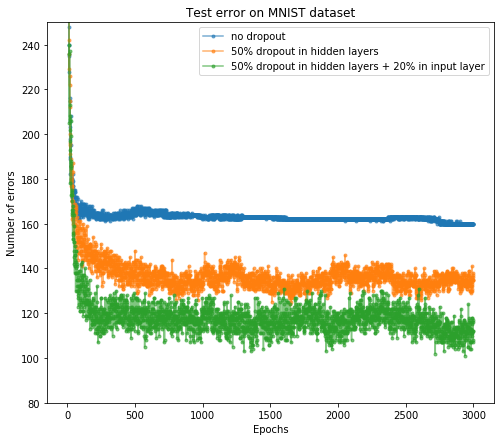

In [12]:
results = IO('results/ffnn1_mnist_dropout_results.pkl').read_pickle()
labels = ['no dropout', '50% dropout in hidden layers', '50% dropout in hidden layers + 20% in input layer']

plt.figure(figsize=(8, 7))
for i, r in enumerate(results):
    plt.plot(range(1, len(r[1])+1), r[1], '.-', label=labels[i], alpha=0.6);
plt.ylim([80, 250]);
plt.legend(loc=1);
plt.xlabel('Epochs');
plt.ylabel('Number of errors');
plt.title('Test error on MNIST dataset');